In [262]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import networkx as nx


In [263]:
#adjacency matrix where a each index is a weight from row i to column j

# Define countries
countries = [f"country {i}" for i in range(8)]

# Assign weights to adjacency matrix
A = np.array([
    [0, 1, 1, 1, 0, 0, 0, 0],  # France
    [1, 0, 1, 1, 0, 0, 0, 1],  # Germany
    [1, 1, 0, 1, 0, 0, 0, 0],  # Italy
    [1, 1, 1, 0, 0, 0, 0, 0],  # Spain
    [0, 0, 0, 0, 0, 1, 1, 1],  # Singapore
    [0, 0, 0, 0, 1, 0, 1, 1],  # Malaysia
    [0, 0, 0, 0, 1, 1, 0, 1],  # Thailand
    [0, 1, 0, 0, 1, 1, 1, 0]  # Indonesia
], dtype=float)

#A = np.random.rand(*A.shape)*0.1

#def propogate_weights(A):




In [264]:
#draw graph
def draw_graph(A, nodes=None):
    G = nx.DiGraph(A)
    
    global labels
    
    if nodes:
        labels = {i: f"{name}" for i, name in enumerate(nodes)}
    else: 
        labels = {i: f"$x_{i}$" for i in range(len(A))}
            

    # Draw the graph
    plt.figure(figsize=(10, 8))
    #pos = nx.spring_layout(G, k=1.5)  # Use spring layout for positioning
    pos = nx.circular_layout(G)  # Circular layout for evenly spaced nodes
    nx.draw(G, pos, node_color='skyblue', node_size=2000, font_size=15, arrowsize=20)
    nx.draw_networkx_labels(G, pos, labels, font_size=12)

    edge_labels = nx.get_edge_attributes(G, "weight")  # Get weights as edge labels
    edge_labels = {k: round(v, 2) for k, v in edge_labels.items()}  # Round to 2 decimal places
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10) # Draw edge labels

    plt.title("Trade Amongst Countries")
    plt.savefig("directed_graph.png", dpi=300)
    
#draw_graph(A, nodes=countries)

In [265]:
#define the lagrangian

def adjacency_to_lagrangian(A):
     L = np.zeros_like(A)

     #populate langrangian matrix with differentials
     for i, row in enumerate(A):
          for j, column in enumerate(row):
               if column != 0:
                    L[j][i] += column
                    L[j][j] += -column
               
     #force the diagonal to be positive

     L = -L

     #print(np.linalg.eigvals(L))
     #print()
     #print(L)
     return L

In [266]:
#plotting

def fun(t, y):
    global A  # Use A as the base adjacency matrix

    # Update weights dynamically based on current GDP (y)
    gdp_scaled = y / np.sum(y)  # Normalize GDPs
    A_dynamic = A * gdp_scaled[:, np.newaxis]  # Scale rows by GDP

    # Recompute Lagrangian dynamically
    dynamic_L = adjacency_to_lagrangian(A_dynamic)

    # Compute the rate of change of GDP
    dy = -dynamic_L @ y
    return dy
    #dy = -L@y
    #return dy


# pre set initial conditions
y0_set=[[1, 2, 3, 4],
        [4, 5, 6, 7],
        [8, 9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]]

# randomized initial conditions
# n = number of initial conditions
n = 1
scale = 100
y0_rand = np.random.rand(n, A.shape[0]) * scale

#print(y0_rand)

#A *= y0_rand / scale

# Normalize initial GDP values
initial_gdp = y0_rand[0]  # Use the first randomized initial condition
normalized_gdp = initial_gdp / np.sum(initial_gdp)  # Normalize to a sum of 1

A = A * normalized_gdp[:, np.newaxis]

L = adjacency_to_lagrangian(A)


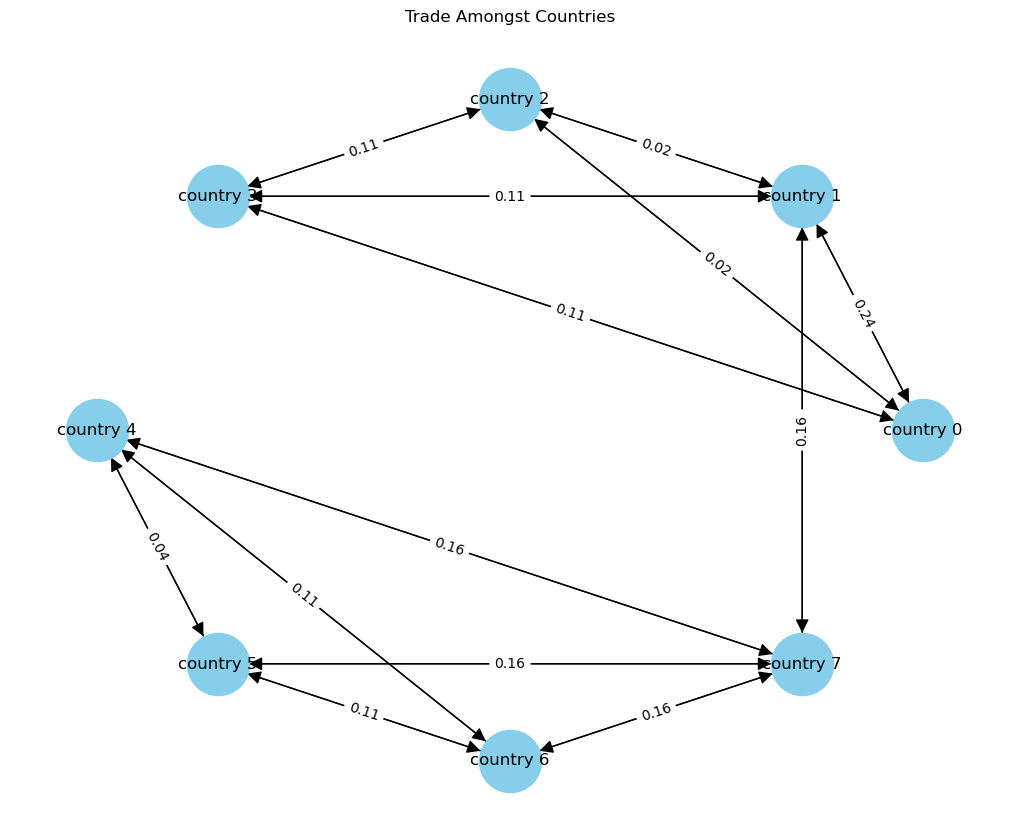

In [267]:
draw_graph(A, nodes=countries)

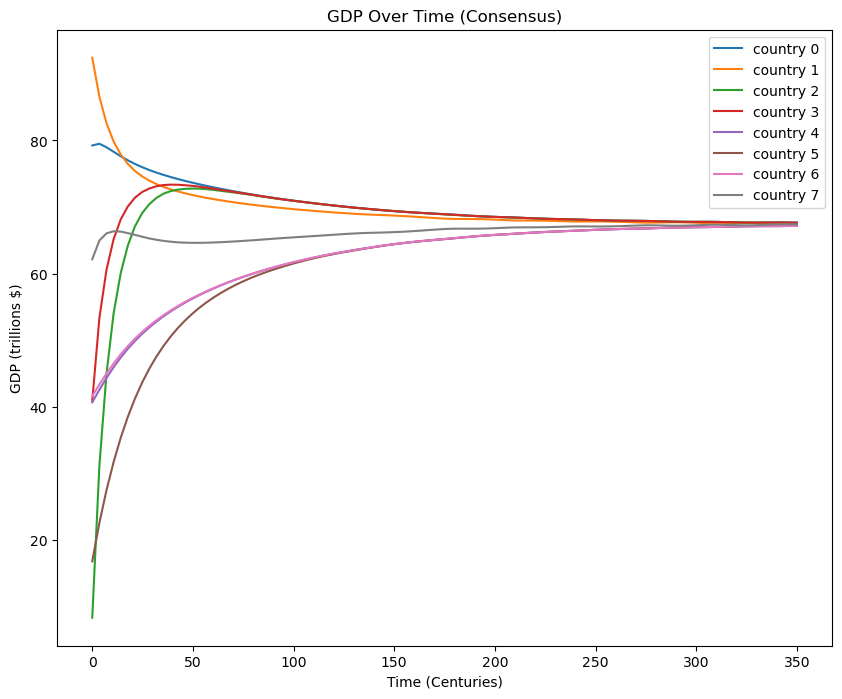

In [268]:
t0 = 0
tf = 350
t_step = 100
t_span = (t0, tf)
t_eval = np.linspace(*t_span, t_step)

plt.figure(figsize=(10,8))

global sol

for i in range(len(y0_rand)):
    sol = solve_ivp(fun, t_span, y0_rand[i], t_eval=t_eval)
    for j, trajectory in enumerate(sol.y):
        plt.plot(sol.t, trajectory, label=labels[j])
        
#print(sol.y[:,99])
        
plt.legend()
plt.title("GDP Over Time (Consensus)")
plt.xlabel("Time (Centuries)")
plt.ylabel("GDP (trillions $)")
plt.savefig("consensus.png", dpi=300)

In [269]:
print(np.average(sol.y[:,99]))

67.4240661928938
